<a href="https://colab.research.google.com/github/joshuaglass/giest/blob/main/Looking_Glass_v1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ruDALL-E is Copyright 2021 Sber AI and licensed under Apache version 2.0**

    http://www.apache.org/licenses/LICENSE-2.0

# License
Looking Glass; Making ruDALL-E fine tuning quick and painless.<br>
Copyright (C) 2021 Bearsharktopus Studios

This program is free software: you can redistribute it and/or modify
it under the terms of the <b>GNU Affero General Public License</b> as
published by the Free Software Foundation, either version 3 of the
License, or (at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

![2021-12-03 15_31_06-GNU Affero General Public License v3 (AGPL-3.0) Explained in Plain English - TLD.png](https://media.discordapp.net/attachments/837903223867047946/916428453547474944/2021-12-03_15_31_06-GNU_Affero_General_Public_License_v3_AGPL-3.0_Explained_in_Plain_English_-_TLD.png?width=972&height=540)

# Terms of Use

Any unauthorized use of these images for profit, monetary gains, and/or commercial means violates the terms of use of this service. 

<b>Due to the nature of the reconfiguring of images generated by Looking Glass, this service is not copyright friendly. Use of these generated images from copyrighted material can open you to litigation by the copyright holder(s).</b>

**Original notebook by Sber AI, squishing down and translation for English use as a one-shot fine tuner done by Bearsharktopus Studios ([@ai_curio](https://twitter.com/ai_curio) on twitter, [reachartwork](https://reachartwork.tumblr.com/) on tumblr).**

Thanks to [@criminygiblet](https://twitter.com/criminygiblet) for the notebook name, [@danielrussruss](https://twitter.com/danielrussruss) for assistance with general questions, [@giovan_h](https://twitter.com/giovan_h) and [@Grump_AI](https://twitter.com/Grump_AI) for code and cleanup assistance, [@MichaelFriese10](https://twitter.com/MichaelFriese10) for the original idea, and my boyfriend for being the best boyfriend in the world.

**TECH SUPPORT DISCORD: https://discord.gg/EjPGKq6rmN**<br>
**SUPPORT THE DEV: https://www.patreon.com/bearsharktopus**

# Changelog

v1.3 -> v1.4: 1/13/22

*   Added Google Drive integration. You can save output as well as save and recall checkpoints.
*   Added **experimental** augmentation options.
*   Moved some options from the first parameter section into a second one, above the image generator. Generation Parameters can be changed without needing to reset the entire notebook.
*   Added ultra-high and ultra-low options for Universe Similarity, Confidence, and Variance. Also, added Variance as a Generation Parameter.
*   Added gif peeling. It can eat gifs now!
*   Your prompt text is now automatically translated from any language into Russian.
*   You can now prompt prompts with separate text from what you actually caption them.
*   Added SWINIR as an alternate upscaler compared to RealESRGan.
*   Resizing in batches! It's still very slow.
<br><br>

v1.1 -> v1.3: 12/18/21

*   Added Stretchsizing as generation parameter. This will stretch out your original image(s) into a square, train on that, and then stretch your output back into the correct aspect ratio. Currently does not work with resizing. Stretchsizing uses the first image in the folder alphanumerically as its aspect ratio parent.
*   Added Confidence as generation parameter. This is the p value, for those that know what that means. If you don't know what that means, just leave it on Low.
*   Lots and lots of code cleanup courtesy of @giovan_h. 
*   No more multi-image tuning - now, image getting uses glob formatting. This should hopefull resolve all the num_samples errors. To get every image in a folder, use `foldername/*`.
*   Added upscaling using rudall-e's built in RealESRGan upscaler.
*   Your generated zip file at the end now includes a text file that has all your parameters.

# INSTRUCTIONS
\#1: Upload your image to the Google Colab file structure, like this:<br>![20.png](https://media.discordapp.net/attachments/837903223867047946/916770154656976926/2021-12-04_14_17_00-Looking_Glass_-_Colaboratory_and_33_more_pages_-_Personal_-_Microsoft_Edge.png)<br><br>
\#2: Put your filename into the parameters, like this, and set the other parameters:<br>![21.png](https://media.discordapp.net/attachments/837903223867047946/916770559398924349/2021-12-04_14_18_34-Looking_Glass_-_Colaboratory_and_33_more_pages_-_Personal_-_Microsoft_Edge.png)<br><br>
\#3: Click "Runtime", then "Restart and Run All". You will need to do this every time you'd like to generate a new set of images, or it will break. <br>![22.png](https://media.discordapp.net/attachments/837903223867047946/916770919974858782/2021-12-04_14_19_42-Looking_Glass_-_Colaboratory_and_33_more_pages_-_Personal_-_Microsoft_Edge.png)<br><br>
\#4: **Wait!** Your images will come out at the very bottom shortly.

## Setup

In [ ]:
#@title
import multiprocessing
import torch
import os
from google.colab import output, drive
from psutil import virtual_memory
from pathlib import Path

ram_gb = round(virtual_memory().total / 1024**3, 1)

print('CPU:', multiprocessing.cpu_count())
print('RAM GB:', ram_gb)
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device.type)

!nvidia-smi

from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
if info.total>10252636672:
  print('Everything is ok, you can begin')
else:
  print('We dont recomend to begin, you gonna get out of memory')

CPU: 12
RAM GB: 83.5
PyTorch version: 1.10.0+cu111
CUDA version: 11.1
cuDNN version: 8005
device: cuda
Sun Jan 16 07:24:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    41W / 400W |      3MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+---------

In [ ]:
#@title
!pip3 install translatepy
from translatepy import Translator, Language
ts = Translator()

#swinir setup
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.figsize': (10.0, 10.0)}

!git clone -qq https://github.com/Lin-Sinorodin/SwinIR_wrapper.git
!pip install -qq timm
from SwinIR_wrapper.SwinIR_wrapper import SwinIR_SR

import cv2
import urllib.request
import matplotlib.pyplot as plt
import numpy
#end swinir setup

     |████████████████████████████████| 811 kB 5.1 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 57 kB 7.1 MB/s 
     |████████████████████████████████| 376 kB 5.2 MB/s 


In [ ]:
#@title
#!pip install rudalle==0.0.1rc4
!git clone https://github.com/neverix/ru-dalle
!mv -f ru-dalle/* ru-dalle/.git .
!rm -rf ru-dalle
!git checkout better-caching
!pip install -e .

!rm -rf output
!mkdir output
output.clear()

# Import model
from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_clip
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan, get_ruclip
from rudalle.utils import seed_everything

model = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)
vae = get_vae().to('cuda')
tokenizer = get_tokenizer()

Downloading:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready


## Parameters

In [ ]:
import glob
!rm -rf crops/*
#@markdown # **PUT YOUR FILENAME HERE**
#@markdown Just put the file name here after uploading it to your file structure and it'll handle the rest.

#@markdown If you want to train on multiple files, put a file glob here (like image_* for image_1.jpg, image_2.jpg...). To grab all images in a folder, use `[FOLDER'S NAME]/*`

file_selector_glob = "pics/*"  # @param {type:"string"}
input_files = glob.glob(file_selector_glob, recursive=True)
print("Input files:", input_files)
if len(input_files) == 0:
  print("Your input files are empty! This will error out - make sure your file_selector_glob is formatted correctly!")

#@markdown <br></br>
#@markdown # Finetuning Options
#@markdown The amount of epochs that training occurs for. Turn down if the images are too similar to the base image. Turn up if they're too different. Use this for fine adjustments.
epoch_amt =   30# @param
#@markdown Universe similarity determines how close to the original images you will receive. Higher similarity produces images that try to stick closely to the original. Lower similarity produces images that use the original more as inspiration. **If you are getting spooky Russian AI ghosts, try turning your similarity higher or training for longer.** 

#@markdown *Note: Universe similarity may be erratic when blending multiple images.*
universe_similarity = "Medium"  # @param ["Ultra-High","High", "Medium", "Low","Ultra-Low"]
if universe_similarity == "High":
    learning_rate = 1e-4
elif universe_similarity == "Medium":
    learning_rate = 2e-5
elif universe_similarity == "Low":
    learning_rate = 1e-5
elif universe_similarity == "Ultra-Low":
    learning_rate = 1e-6
elif universe_similarity == "Ultra-High":
    learning_rate = 2e-4
else:
    learning_rate = 1e-5
#@markdown Input text can influence the end result you get to a minor degree, so you have the option to change it now. **Input text is automatically translated from any language to Russian.**
input_text = "Brutalist pixel art corridor #pixelart"  # @param {type:"string"}
if input_text == "":
  input_text = "\u0420\u0438\u0447\u0430\u0440\u0434 \u0414. \u0414\u0436\u0435\u0439\u043C\u0441"
else:
  input_lang = ts.language(input_text).result.alpha2
  if input_lang != 'ru':
    input_text = ts.translate(input_text, "ru").result


class Args():
    def __init__(self):
        self.text_seq_length = model.get_param('text_seq_length')
        self.total_seq_length = model.get_param('total_seq_length')
        self.epochs = epoch_amt
        self.save_dir = 'checkpoints'
        self.model_name = 'lookingglass'
        self.save_every = 2000
        self.prefix_length = 10
        self.bs = 1
        self.clip = 0.24
        self.lr = learning_rate
        self.warmup_steps = 50
        self.wandb = False

torch_args = Args()
if not os.path.exists(torch_args.save_dir):
    os.makedirs(torch_args.save_dir)

#@markdown <br></br>
#@markdown #Collage Options
#@markdown The amount of images to generate per collage and the amount of collages to generate. The generator uses batching in order to make up to four images at once - turn on low_mem mode if it crashes while attempting to make 4, 9, or 25 images. Less images are faster.
image_amount = "1"  # @param [1, 4, 9, 25]
image_amount = int(image_amount)
collage_amount = 1  # @param {type:"number"}

#@markdown If you *really* want to make a 9 or 25 image collage but have a weak CPU, you can try turning on low mem mode. It will take a *while* though.
low_mem = False  # @param {type:"boolean"}

#@markdown By default, Looking Glass includes your original image(s) somewhere in the collage as "Ground Truth". Check this box to disable that behavior.
skip_gt = True  # @param {type:"boolean"}

#@markdown #Output Resizer
#@markdown If you'd like to change the shape or size of the output from its default 256x256 set "resize" to true.<br>Note that this is **much slower**.<br>Not only is the process itself slower but it forces itself to run with a batch_size of 1, meaning it forces you into low_mem mode, which makes pictures take a while. Buyer beware.
do_resize = False  # @param {type:"boolean"}
#if do_resize:
#    low_mem = True
width =   512# @param {type:"number"}
height =   240# @param {type:"number"}
token_width = round(width / 8)
token_height = round(height / 8)

#@markdown <br></br>
#@markdown #Stretchsizing
#@markdown A more crude form of image resizing that squishes your initial image down to 256x256, and then expands the output images back to your original image's aspect ratio. May result in artifacts, but runs much faster than Output Resizing.
#@markdown <br>CURRENTLY INCOMPATIBLE WITH OUTPUT RESIZING. I WILL FIX THIS EVENTUALLY I'M JUST LAZY.
do_stretchsize = False  # @param {type:"boolean"}

ss_size_parent = input_files[0]
if do_stretchsize:
    ss_realesrgan = get_realesrgan("x2", device=device)


#@markdown <br><br>
#@markdown #Upscaling
#@markdown Uses RealESRGAN to upscale your images at the end. That's it! Set to x1 to disable. Not recommended to be combined w/ Stretchsizing.
rurealesrgan_multiplier = "x1"  # @param ["x1", "x2", "x4", "x8"]
if rurealesrgan_multiplier != "x1":
    realesrgan = get_realesrgan(rurealesrgan_multiplier, device=device)

#@markdown Uses Swinir to upscale your images at the end. That's it! Incompatible with and overrides RealESRGan. Set to "Disabled" to disable.
swinir_model = "Disabled" #@param ["Disabled", "real_sr x4", "classical_sr x2", "classical_sr x3", "classical_sr x4", "classical_sr x8", "lightweight x2", "lightweight x3", "lightweight x4"]
do_swinir = False
if swinir_model != "Disabled":
  model_type, scale = swinir_model.split(' ')
  scale = int(scale[1])
  # initialize super resolution model
  sr = SwinIR_SR(model_type, scale)
  print(f'Loaded SWINIR {swinir_model} successfully')
  do_swinir = True
  rurealesrgan_multiplier = "x1"

import re
original_folder = re.sub(r'[/*?]', '-', file_selector_glob)
print("Identifier", original_folder)


Input files: ['pics/jankcorridor.png']
Identifier pics--


## Advanced Options

In [ ]:
#@title Image Augmentation Code from [@Grump_AI](https://twitter.com/Grump_AI).
import random
import math
from PIL import Image

def all_crops(image_path, distance_between_crops, out_path):
  """
  Saves all square-sized crops starting from the leftmost or topmost edge of the image.
  :param str image_path: Path to the image to crop
  :param int distance_between_crops: Distance between each unique crop in pixels
  :param str out_path: Directory to save images
  """

  image_name = image_path.split('/')[-1].split('.')[0]
  image = Image.open(image_path)

  # calculate valid center points
  width, height = image.size
  size = 256
  center_width = 0
  center_height = 0
  num_crops = 1
  horizontal = True
  if width > height:
    center_width = center_height = int(height/2)
    size = height
    num_crops = int(round((width-height)/distance_between_crops)) + 1
  elif height >= width:
    center_width = center_height = int(width/2)
    size = width
    num_crops = int(round((height-width)/distance_between_crops)) + 1
    horizontal = False
  s2 = int(round(size/2))
  
  for _ in range(num_crops):
    image.crop((center_width-s2, center_height-s2, center_width+s2, center_height+s2)).save(f'{out_path}/{image_name}-cropped-{size}px-{center_width}-{center_height}.png')
    if horizontal:
      center_width = center_width + distance_between_crops
    else:
      center_height = center_height + distance_between_crops
  print(str(num_crops) + " images generated line crop")
  
def random_crop(image_path, size, num_crops, out_path):
  """
  Save images cropped to desired size with random center points
  Only valid unique crops are saved, even if its fewer than num_crops
  :param str image_path: Path to the image to crop
  :param int size: Size in pixels of desired crop
  :param int num_crops: Number of crops desired
  :param str out_path: Directory to save images
  """

  image_name = image_path.split('/')[-1].split('.')[0]
  image = Image.open(image_path)

  if size % 2 != 0:
    raise Exception('crop size must be even')
  if any(map(lambda x: x < size+1, image.size)):
    raise Exception(f'image size of:{image.size} too small for crop size of: {size}')

  # calculate valid center points
  width, height = image.size
  left_bound, top_bound = size/2, size/2
  right_bound = width - size/2
  bottom_bound = height - size/2
  valid_center_points = int((right_bound - left_bound) * (bottom_bound - top_bound))

  # if there are fewer valid center points than requested crops
  # then produce fewer crops
  if valid_center_points < num_crops:
    num_crops = valid_center_points

  used_center_points = []
  for _ in range(num_crops):
    # ensure uniqueness of center points
    # slower when valid_center_points is near num_crops
    while True:
      w = random.randrange(left_bound, right_bound)
      h = random.randrange(top_bound, bottom_bound)
      if not ([w,h] in used_center_points):
        break

    used_center_points.append([w,h])

    image.crop((w-(size/2), h-(size/2), w+(size/2), h+(size/2))).save(f'{out_path}/{image_name}-cropped-{size}px-{w}-{h}.png')
  print(str(num_crops) + " images generated random crop")

In [ ]:
#@title Image Augmentation Parameters
#@markdown Image augmentation uses your images to generate variant images in order to give the AI a more complete view of your input images. Currently, the only available augmentation option is "Random Crop", which produces random square crops of the designated size from your image.

do_random_crop = False # @param {type:"boolean"}
random_crop_size =  240# @param {type:"integer"}
num_crops =  24# @param {type:"integer"}
if do_random_crop:
  Path('/content/crops').mkdir(parents=True, exist_ok=True)
  for image_path in input_files:
    image = Image.open(image_path)
    if image.size[0] > random_crop_size and image.size[1] > random_crop_size:
      # math.floor((image.size[0]*image.size[1])/(rcrop_size*rcrop_size))
      random_crop(image_path, random_crop_size, num_crops, '/content/crops')

#Line Cropping has unsatisfactory results with multiple images
#So it's commented out for now. Feel free to un-comment it if you want
do_line_crop = False
#line_crop_spacing = 128 # @param {type:"integer"}
#if do_line_crop:
#  Path('/content/crops').mkdir(parents=True, exist_ok=True)
#  for image_path in original_input_files:
#    image = Image.open(image_path)
#    if image.size[0] > line_crop_spacing*2 or image.size[1] > line_crop_spacing*2:
#      all_crops(image_path, line_crop_spacing, 'crops')

if do_random_crop or do_line_crop:
  input_files += glob.glob('/content/crops/*', recursive=True)

24 images generated random crop


In [ ]:
#@title
# Write data_desc csv
import csv

with open('data_desc.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['', 'name', 'caption'])
    for i, filepath in enumerate(input_files):
      csvwriter.writerow([i, filepath, input_text])

**We gonna generate some <strike>sneakers</strike> EVERYTHING**

## Some definitions and boilerplate

## Finetuning

finetuning goes brrr:   0%|          | 0/125 [00:00<?, ?it/s]/content/rudalle/dalle/model.py:79: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim
finetuning goes brrr: 100%|██████████| 125/125 [00:33<00:00,  3.92it/s, loss=4.27]

Completly tuned and saved here  lookingglass__dalle_last.pt


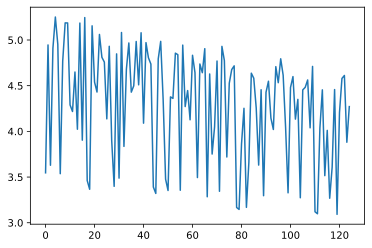

finetuning goes brrr: 100%|██████████| 125/125 [00:39<00:00,  3.15it/s, loss=4.27]


## Generation

In [ ]:
gc.collect()
torch.cuda.empty_cache() 
#@markdown Drive Integration Cell
savepath = os.path.join("content", torch_args.save_dir, f"{torch_args.model_name}_dalle_last.pt")
if save_checkpoint_in_drive:
  !cp {savepath} {mount_location}/MyDrive/{torch_args.model_name}_dalle_last.pt
if restore_checkpoint_from_drive:
  !cp {mount_location}/MyDrive/{torch_args.model_name}_dalle_last.pt {savepath}
  model_path = os.path.join('/content/'+torch_args.save_dir,f"{torch_args.model_name}_dalle_last.pt")
  model = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)
  model.load_state_dict(torch.load(model_path))
  print(f'Loaded from {model_path}')
vae = get_vae().to(device)

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.
vae --> ready


# Images

In [ ]:
#@markdown # **RUNTIME OPTIONS**
#@markdown These options can be changed in between image generations to alter how the image generates.<br><br>
#@markdown Confidence is how closely the AI will attempt to match the input images. Higher confidence, the more the AI can go "off the rails". This variable is also called "top_p". Think of confidence as the "conceptual similarity" control. Default for prior versions is Low.
confidence = "Low"  # @param ["Ultra-High", "High", "Medium", "Low", "Ultra-Low"]
generation_p = 0.999
if confidence == "Ultra-High":
    generation_p = 0.8
elif confidence == "High":
    generation_p = 0.9
elif confidence == "Medium":
    generation_p = 0.99
elif confidence == "Low":
    generation_p = 0.999
elif confidence == "Ultra-Low":
    generation_p = 0.9995
else:
    generation_p = 0.999

#@markdown Variability affects the potential number of options that the AI can choose from for each "token", or each 8x8 chunk of pixels that it generates. Higher variability, higher amount. This variable is also called "top_k". Think of variability as the "stylistic similarity" control. Default for prior versions is "High".
variability = "Ultra-High"  # @param ["Ultra-High", "High", "Medium", "Low", "Ultra-Low"]
generation_k = 8192
if variability == "Ultra-High":
    generation_k = 8192
elif variability == "High":
    generation_k = 2048
elif variability == "Medium":
    generation_k = 512
elif variability == "Low":
    generation_k = 128
elif variability == "Ultra-Low":
    generation_k = 32
else:
    generation_k = 8192

#@markdown If you'd like to prompt the AI with a different text input than what your images are captioned with, you can do so here. Leave blank to use your `input_text`. Text is automatically translated to Russian.
prompt_text = "" # @param {type:"string"}
if prompt_text == "":
  prompt_text = input_text
else:
  input_lang = ts.language(input_text).result.alpha2
  if input_lang != 'ru':
    prompt_text = ts.translate(input_text, "ru").result

  0%|          | 0/1920 [00:00<?, ?it/s]/content/rudalle/dalle/model.py:79: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim
100%|██████████| 1920/1920 [02:42<00:00, 11.81it/s]


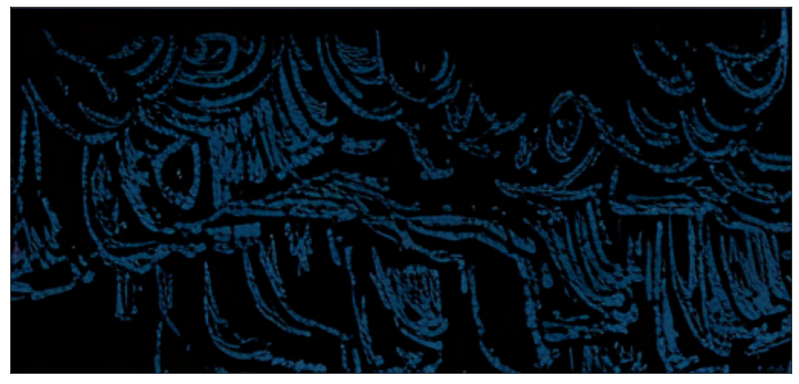

1873

In [ ]:
#@markdown Run this cell to zip the output folder and save info into a zip file called "output\<time\>.zip"

from datetime import datetime
import pprint
current_time = datetime.now().strftime('%y%m%d-%H%M%S_%f')

interesting_vars = [
    'file_selector_glob',
    'epoch_amt',
    'universe_similarity',
    'confidence',
    'variability',
    'user_input_text',
    'input_text',
    'prompt_text',
    'image_amount',
    'collage_amount',
    'low_mem',
    'skip_gt',
    'do_resize',
    'width',
    'height',
    'token_width',
    'token_height',
    'do_stretchsize',
    'rurealesrgan_multiplier',
    'ram_gb',
]

interesting_vars += [
    k for k in globals()
    if k.startswith("NVML_")
]

interesting_values = [f"{k}: {globals().get(k)!r}" for k in interesting_vars]
newline = '\n'
infodump = f"""Generated with Looking Glass v{LOOKING_GLASS_VERSION}

CPU: {multiprocessing.cpu_count()}
PyTorch version: {torch.__version__}
CUDA version: {torch.version.cuda}
cuDNN version: {torch.backends.cudnn.version()}

{get_ipython().system('nvidia-smi')}

{newline.join(interesting_values)}
"""

print(infodump)

## You almost certainly do not want this.
# infodump += f"""
# INFO FOR NERDS:

# {pprint.pformat(globals())}
# """

with open(os.path.join('output', f"{current_time}.txt"), "w") as fp:
    fp.write(infodump)

output_zip_name = f"output{current_time}.zip"

!zip -r {output_zip_name} output/